In [173]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import lines
%matplotlib inline

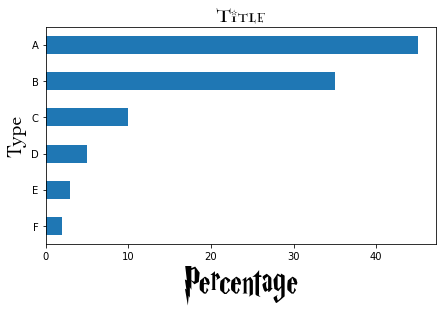

In [105]:
df = pd.DataFrame({'perc': pd.Series([45, 35, 10, 5, 3, 2], index=['A', 'B', 'C','D','E','F'])})

# specify the custom font to use
prop1 = fm.FontProperties(fname='/Library/Fonts/HarryP.ttf', size=40)
prop1a = fm.FontProperties(fname='/Library/Fonts/HarryP.ttf', size=23)
prop2 = fm.FontProperties(fname='/Library/Fonts/Cochin.ttc', size=20)
prop3 = fm.FontProperties(fname='/Library/Fonts/Lumos.ttf', size=20)
prop3a = fm.FontProperties(fname='/Library/Fonts/Lumos.ttf', size=10)

fig, ax = plt.subplots(figsize=(7,4))
df.iloc[::-1].plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Percentage', fontproperties=prop1)
ax.set_ylabel('Type', fontproperties=prop2)
ax.set_title('Title', fontproperties=prop3)
plt.show()
#plt.savefig('test.png')

In [3]:
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/SFCompactRounded-Light.otf',
 '/usr/X11R6/lib/X11/fonts/TTF/luximbi.ttf',
 '/Library/Fonts/Brush Script.ttf',
 '/System/Library/Fonts/SFCompactDisplay-Semibold.otf',
 '/usr/X11/lib/X11/fonts/TTF/luxirb.ttf',
 '/Library/Fonts/Impact.ttf',
 '/usr/X11/lib/X11/fonts/TTF/VeraMono.ttf',
 '/System/Library/Fonts/SFNSDisplay-HeavyItalic.otf',
 '/System/Library/Fonts/SFNSDisplay-BlackItalic.otf',
 '/Library/Fonts/STIXVarBol.otf',
 '/Library/Fonts/STIXSizTwoSymBol.otf',
 '/System/Library/Fonts/SFCompactRounded-Heavy.otf',
 '/Library/Fonts/Luminari.ttf',
 '/Library/Fonts/PlantagenetCherokee.ttf',
 '/Library/Fonts/Silom.ttf',
 '/System/Library/Fonts/SFNSDisplay-LightItalic.otf',
 '/Library/Fonts/Trebuchet MS Bold Italic.ttf',
 '/System/Library/Fonts/Apple Braille.ttf',
 '/System/Library/Fonts/SFNSTextItalic.ttf',
 '/Library/Fonts/STIXGeneral.otf',
 '/usr/X11R6/lib/X11/fonts/TTF/VeraMono.ttf',
 '/System/Library/Fonts/SFCompactText-Medium.otf',
 '/System/Library/Fonts/SFNSDisp

In [4]:
data = pd.read_csv('swd-6-3-19.csv')

In [5]:
for col in data.columns:
    print(type(data[col][0]))

<class 'str'>
<class 'numpy.float64'>


In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
for col in data.columns:
    print(type(data[col][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>


In [8]:
data.head()

,date,sales
0,2018-01-01,1.610
1,2018-02-01,1.626
2,2018-03-01,1.742
3,2018-04-01,1.686
4,2018-05-01,1.798


In [19]:
data['stable'] = np.nan
data['down'] = np.nan
data['up'] = np.nan
data['future'] = np.nan
data.loc[0, 'stable'] = data.loc[0, 'sales']
data.loc[5, 'stable'] = data.loc[5, 'sales']
data.loc[6, 'down'] = data.loc[6, 'sales']
data.loc[13, 'up'] = data.loc[13, 'sales']
data.loc[17, 'up'] = data.loc[17, 'sales']
data.loc[23, 'future'] = data.loc[23, 'sales']

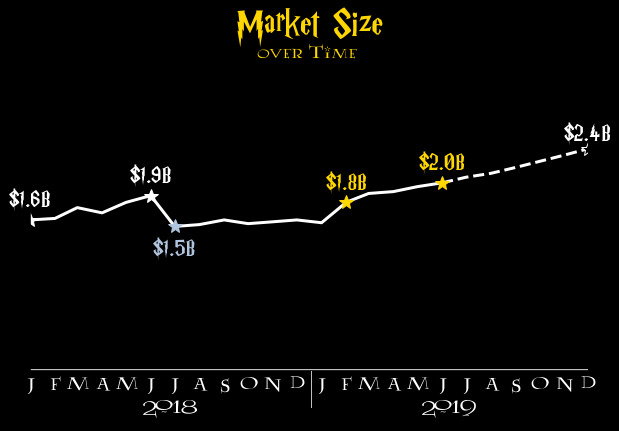

In [188]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('black')
ax.set_facecolor('black')

ax.plot(data.loc[data['date'] <= '2019-06-01', 'date'],
        data.loc[data['date'] <= '2019-06-01', 'sales'],
        color='white', linewidth='3')
ax.plot(data.loc[data['date'] >= '2019-06-01', 'date'],
        data.loc[data['date'] >= '2019-06-01', 'sales'],
        color='white', linestyle='--', linewidth=3)
ax.plot(data['date'], data['stable'], '*', color='white', markersize=15)
ax.plot(data['date'], data['down'], '*', color='lightsteelblue', markersize=15)
ax.plot(data['date'], data['up'], '*', color='gold', markersize=15)
ax.plot(data['date'], data['future'], '*', markeredgecolor='white', markerfacecolor='black', markersize=15)

for x, y in zip(data['date'], data['stable']):
    if np.isnan(y):
        continue
    else:
        ax.annotate('${:.1f}B'.format(y), xy=(x, y+0.15),
                    ha='center', color='white', fontproperties=prop1a)

for x, y in zip(data['date'], data['down']):
    if np.isnan(y):
        continue
    else:
        ax.annotate('${:.1f}B'.format(y), xy=(x, y-0.3),
                    ha='center', color='lightsteelblue', fontproperties=prop1a)

for x, y in zip(data['date'], data['up']):
    if np.isnan(y):
        continue
    else:
        ax.annotate('${:.1f}B'.format(y), xy=(x, y+0.15),
                    ha='center', color='gold', fontproperties=prop1a)

for x, y in zip(data['date'], data['future']):
    if np.isnan(y):
        continue
    else:
        ax.annotate('${:.1f}B'.format(y), xy=(x, y+0.1),
                    ha='center', color='white', fontproperties=prop1a)


ax.set_ylim([0, 3.5])
ax.set_xlim(['2018-01-01', '2019-12-01'])
ax.set_title('Market Size', fontproperties=prop1, color='gold')
plt.suptitle('over Time', fontproperties=prop3, color='gold',
            x=0.51, y=0.88)
ax.spines['left'].set_visible(False)
ax.axhline(linewidth=3, color='silver')
ax.spines['bottom'].set_color('silver')
ax.set_xticks(data['date'])
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'], 
                   color='white', fontproperties=prop3)
#ax.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct', 'Jan', 'Apr', 'Jul', 'Oct'], 
                  # color='white', fontproperties=prop3)

ax1 = ax.twiny()
ax1.set_xlim(0, 4)
ax1.set_xticks([1, 3])
ax1.spines['top'].set_color('black')
ax1.spines['top'].set_position(('outward', -380))
ax1.set_xticklabels(['2018', '2019'], 
                    color='white', fontproperties=prop3)
line = lines.Line2D([0.515, 0.515], [0.04, 0.126], transform=fig.transFigure,
                   color='silver', linewidth=1)
line.set_clip_on(False)
ax.add_line(line)

plt.show()